## Import des bibliothéques

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import tensorflow as tf
from tensorflow import keras
from data_transfo import get_train_test_cnn, get_train_test_rnn
from rnns import display_model, create_simple_rnn, compile_model, train_rnn, create_complex_rnn
import pandas as pd


2022-06-07 16:57:50.784525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 16:57:50.784574: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Traitement des données

### Téléchargement des datasets

In [2]:
train_df = pd.read_csv('https://maxime-devanne.com/datasets/ECG200/ECG200_TRAIN.tsv', sep='\t', header=None)
test_df = pd.read_csv('https://maxime-devanne.com/datasets/ECG200/ECG200_TEST.tsv', sep='\t', header=None)

### Préparation des données de d'entrainement et de test

In [3]:
x_train, y_train, x_test, y_test = get_train_test_rnn(
                                                        train_df,
                                                        test_df
                                                        )

(200, 96)
(200, 96, 1)


## RNN

### Construction des layers

In [4]:
simple_rnn = create_complex_rnn(x_train, y_train, drop=0.3, rec_drop=0.1)

2022-06-07 16:58:09.151768: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-07 16:58:09.151885: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-07 16:58:09.151957: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cc-t14): /proc/driver/nvidia/version does not exist
2022-06-07 16:58:09.152966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compilation du modèle

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(1, 96, 1)]              0         
                                                                 
 lstm (LSTM)                 (1, 96, 15)               1020      
                                                                 
 lstm_1 (LSTM)               (1, 15)                   1860      
                                                                 
 dense (Dense)               (1, 2)                    32        
                                                                 
Total params: 2,912
Trainable params: 2,912
Non-trainable params: 0
_________________________________________________________________


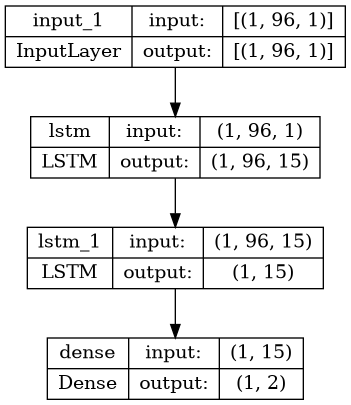

In [5]:
compile_model(simple_rnn)
display_model(simple_rnn)

### Entrainement

In [6]:
train_rnn(simple_rnn, x_train, y_train, 2)

### Evaluation sur les données de test

In [7]:
loss,acc = simple_rnn.evaluate(x_test,y_test, batch_size=1, verbose=False)

print("L'accuracy sur l'ensemble du test est:",acc)

L'accuracy sur l'ensemble du test est: 0.6499999761581421
